# 3250 Foundations of Data Science – Homework Assignment 4
### Space Shuttle Challenger and O-Ring

#### Import Packages

In [15]:
#############################################
## Import all of the packages that we need.
#############################################
import statsmodels.api as statsMod
import pandas as pd
import matplotlib.pyplot as pplot
import math

#### STEP 1: Read in the data

In [16]:
##############################
## STEP 1: read in the data
###
rawData = '''6,0,66,50,1
6,1,70,50,2
6,0,69,50,3
6,0,68,50,4
6,0,67,50,5
6,0,72,50,6
6,0,73,100,7
6,0,70,100,8
6,1,57,200,9
6,1,63,200,10
6,1,70,200,11
6,0,78,200,12
6,0,67,200,13
6,2,53,200,14
6,0,67,200,15
6,0,75,200,16
6,0,70,200,17
6,0,81,200,18
6,0,76,200,19
6,0,79,200,20
6,2,75,200,21
6,0,76,200,22
6,1,58,200,23'''

## Create a list to hold the column names
dataAttrNames = ['NUMBER_OF_O_RINGS_AT_RISK_ON_A_GIVEN_FLIGHT',
'NUMBER_EXPERIENCING_THERMAL_DISTRESS',
'LAUNCH_TEMPERATURE_DEGREE_F',
'LEAK_CHECK_PRESSURE_PSI',
'TEMPORAL_ORDER_OF_FLIGHT']

## Split on new-line
rawLines = rawData.split("\n")
## Split each line on comma
dataList = [ line.split(",") for line in rawLines ]

## All data elements are of type 'str'. Convert them to integers.
for rowCounter in range(len(dataList)):
    for colCounter in range(len(dataList[0])):
        try:
            dataList[rowCounter][colCounter] = int( dataList[rowCounter][colCounter] )
        except:
            pass

## Cast the data as a pandas Data Frame
oRingDataFrame = pd.DataFrame(data=dataList, columns=dataAttrNames)


#### STEP 2: Explore the data

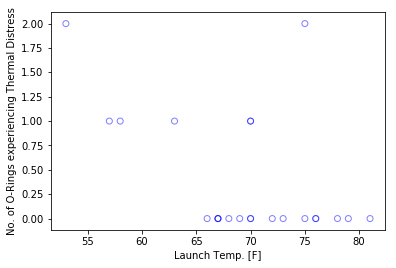

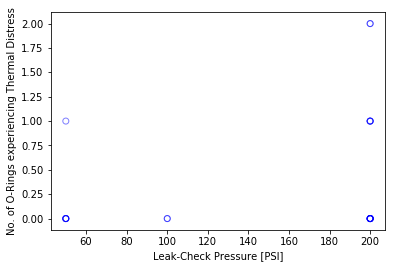

In [17]:
##############################
## STEP 2: do some analysis 
## to see if any patterns 
## emerge
###

## Plot the data to see if any patterns are immediately obvious.
## First plot Launch Temp. vs. Num of oRings experiencing thermal distress.
## ==> it looks like lower launch temperatures see more o-Rings failing.
pplot.scatter(oRingDataFrame.LAUNCH_TEMPERATURE_DEGREE_F, oRingDataFrame.NUMBER_EXPERIENCING_THERMAL_DISTRESS,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.5 )
pplot.xlabel('Launch Temp. [F]')
pplot.ylabel('No. of O-Rings experiencing Thermal Distress')
pplot.show()

## Then plot Leak-Check Pressure vs. Num of oRings experiencing thermal distress
## ==> it looks like higher pressures see more o-Rings failing.
pplot.scatter(oRingDataFrame.LEAK_CHECK_PRESSURE_PSI, oRingDataFrame.NUMBER_EXPERIENCING_THERMAL_DISTRESS,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.5 )
pplot.xlabel('Leak-Check Pressure [PSI]')
pplot.ylabel('No. of O-Rings experiencing Thermal Distress')
pplot.show()

#### STEP 3A: Fit a linear regression model [Temperature only]

In [18]:
##############################
## STEP 4A: fit a regression 
## model [Temperature & Pressure]
predictors_1 = oRingDataFrame[['LAUNCH_TEMPERATURE_DEGREE_F']]
predictors_1 = statsMod.add_constant(predictors_1, prepend=True)
targetVariable = oRingDataFrame[['NUMBER_EXPERIENCING_THERMAL_DISTRESS']]
oRingFailRegrModel_TempOnly = statsMod.OLS(targetVariable, predictors_1).fit()
print oRingFailRegrModel_TempOnly.summary()

                                     OLS Regression Results                                     
Dep. Variable:     NUMBER_EXPERIENCING_THERMAL_DISTRESS   R-squared:                       0.261
Model:                                              OLS   Adj. R-squared:                  0.226
Method:                                   Least Squares   F-statistic:                     7.426
Date:                                  Sat, 15 Jul 2017   Prob (F-statistic):             0.0127
Time:                                          00:11:17   Log-Likelihood:                -18.959
No. Observations:                                    23   AIC:                             41.92
Df Residuals:                                        21   BIC:                             44.19
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                              

#### STEP 3B: Predict o-Ring failures at Temperature = 31 degree-F

In [19]:
## Prepare inputs for prediction
inputsForPrediction_1 = pd.DataFrame({'LAUNCH_TEMPERATURE_DEGREE_F' : [31]})

## Do the prediction
## First add an intercept column
inputsForPrediction_1 = statsMod.add_constant(inputsForPrediction_1, has_constant='add')

inputsForPrediction_1['PREDICTED_NUM_O_RING_FAILURES'] = oRingFailRegrModel_TempOnly.predict(inputsForPrediction_1)


print("\n===================================")
print("==    Predictions [MODEL 1]      ==")
print("===================================\n")
print inputsForPrediction_1

print '\nAt 31 degree-F, our model predicts that approx. ' + str(math.ceil(inputsForPrediction_1.PREDICTED_NUM_O_RING_FAILURES.mean())) + ' [' + str(inputsForPrediction_1.PREDICTED_NUM_O_RING_FAILURES.mean()) + '] o-Rings are likely to suffer erosion or blowby.'


==    Predictions [MODEL 1]      ==

   const  LAUNCH_TEMPERATURE_DEGREE_F  PREDICTED_NUM_O_RING_FAILURES
0    1.0                           31                       2.224683

At 31 degree-F, our model predicts that approx. 3.0 [2.22468253968] o-Rings are likely to suffer erosion or blowby.


#### STEP 4A: Fit a linear regression model [Temperature & Pressure]

In [20]:
##############################
## STEP 4A: fit a regression 
## model [Temperature & Pressure]
predictors_2 = oRingDataFrame[['LAUNCH_TEMPERATURE_DEGREE_F', 'LEAK_CHECK_PRESSURE_PSI']]
predictors_2 = statsMod.add_constant(predictors_2, prepend=True)
targetVariable = oRingDataFrame[['NUMBER_EXPERIENCING_THERMAL_DISTRESS']]
oRingFailRegrModel_tempAndPress = statsMod.OLS(targetVariable, predictors_2).fit()
print oRingFailRegrModel_tempAndPress.summary()

                                     OLS Regression Results                                     
Dep. Variable:     NUMBER_EXPERIENCING_THERMAL_DISTRESS   R-squared:                       0.354
Model:                                              OLS   Adj. R-squared:                  0.290
Method:                                   Least Squares   F-statistic:                     5.490
Date:                                  Sat, 15 Jul 2017   Prob (F-statistic):             0.0126
Time:                                          00:11:18   Log-Likelihood:                -17.408
No. Observations:                                    23   AIC:                             40.82
Df Residuals:                                        20   BIC:                             44.22
Df Model:                                             2                                         
Covariance Type:                              nonrobust                                         
                              

#### STEP 4B: Predict o-Ring failures at Temperature = 31 deg. F & Pressure in [0, 100, 150, 200] PSI

In [21]:
## Prepare inputs for prediction
inputsForPrediction_2 = pd.DataFrame({'LAUNCH_TEMPERATURE_DEGREE_F' : [31,31,31,31], 'LEAK_CHECK_PRESSURE_PSI' : [0,50,100,200]})

## Do the prediction
## First add an intercept column
inputsForPrediction_2 = statsMod.add_constant(inputsForPrediction_2, has_constant='add')

inputsForPrediction_2['PREDICTED_NUM_O_RING_FAILURES'] = oRingFailRegrModel_tempAndPress.predict(inputsForPrediction_2)

print("\n===================================")
print("==    Predictions [MODEL 2]      ==")
print("===================================\n")
print inputsForPrediction_2

print '\nAt 31 degree-F, Model 2 predicts that approx. ' + str(math.ceil(inputsForPrediction_2.PREDICTED_NUM_O_RING_FAILURES.mean())) + ' [' + str(inputsForPrediction_2.PREDICTED_NUM_O_RING_FAILURES.mean()) + '] o-Rings are likely to suffer erosion or blowby.'


==    Predictions [MODEL 2]      ==

   const  LAUNCH_TEMPERATURE_DEGREE_F  LEAK_CHECK_PRESSURE_PSI  \
0    1.0                           31                        0   
1    1.0                           31                       50   
2    1.0                           31                      100   
3    1.0                           31                      200   

   PREDICTED_NUM_O_RING_FAILURES  
0                       1.821027  
1                       1.967993  
2                       2.114959  
3                       2.408892  

At 31 degree-F, Model 2 predicts that approx. 3.0 [2.07821785829] o-Rings are likely to suffer erosion or blowby.
